In [1]:
from pipeline.gui import tabs

In [2]:
tabs.start_gui()

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'


TypeError: arguments did not match any overloaded call:
  addWidget(self, w: Optional[QWidget]): argument 1 has unexpected type 'GraphicsLayoutWidget'
  addWidget(self, a0: Optional[QWidget], row: int, column: int, alignment: Union[Qt.Alignment, Qt.AlignmentFlag] = Qt.Alignment()): argument 1 has unexpected type 'GraphicsLayoutWidget'
  addWidget(self, a0: Optional[QWidget], row: int, column: int, rowSpan: int, columnSpan: int, alignment: Union[Qt.Alignment, Qt.AlignmentFlag] = Qt.Alignment()): argument 1 has unexpected type 'GraphicsLayoutWidget'

In [11]:
im_new='RFP_s01_f0008_z0001.tif'
im_old='mask_red_f0008_z0001.tif'
channel_seg='red'
chan_seg='RFP'
f=7

In [2]:
from nd2reader import ND2Reader

ModuleNotFoundError: No module named 'nd2reader'

In [13]:
path = '/home/Fabian/ImageData/c1133LasterVF.nd2'

In [8]:
img_obj = ND2Reader(path)

NameError: name 'ND2Reader' is not defined

In [ ]:
img_obj.get_frame_2D()

In [3]:
from nd2 import ND2File

In [14]:
nd_obj = ND2File(path)

/tmp/ipykernel_5717/1510673542.py:1: UserWarning: ND2File file not closed before garbage collection. Please use `with ND2File(...):` context or call `.close()`.
  nd_obj = ND2File(path)


In [7]:
c=1
t=10
p=0
z=1

In [17]:
import time

In [34]:
def get_frame(nd_obj, timestamp:int, field_of_view:int, z_stack_number:int):

        field_of_view = 0 if field_of_view is None else field_of_view
        timestamp = 0 if timestamp is None else timestamp
        z_stack_number = 0 if z_stack_number is None else z_stack_number
        

        for entry in nd_obj.events():
                if ('Z Index' not in entry or entry['Z Index'] == z_stack_number) and entry['T Index'] == timestamp and entry['P Index'] == field_of_view:
                        return entry['Index']
        return None


In [35]:
get_frame(nd_obj=nd_obj, channel=c, timestamp=t, field_of_view=p, z_stack_number=1)

30

In [15]:
nd_obj.events()[0].keys()

dict_keys(['Time [s]', 'Index', 'T Index', 'P Index', 'Z Index', 'Position Name', 'Z-Series', 'Camera Temperature [°C]', 'Exposure Time [ms]', 'PFS Offset', 'PFS Status', 'X Coord [µm]', 'Y Coord [µm]', 'Z Coord [µm]', 'Ti2 ZDrive [µm]', 'NIDAQ Piezo Z (name: Piezo Z) [µm]', 'Camera Time [msec]'])

In [16]:
nd_obj.events()

[{'Time [s]': 26.511081199998966,
  'Index': 0,
  'T Index': 0,
  'P Index': 0,
  'Z Index': 0,
  'Position Name': '#1',
  'Z-Series': -46.0,
  'Camera Temperature [°C]': -19.94,
  'Exposure Time [ms]': 100.0,
  'PFS Offset': 10277,
  'PFS Status': 3,
  'X Coord [µm]': 32203.800000000003,
  'Y Coord [µm]': -24021.300000000003,
  'Z Coord [µm]': 3654.0,
  'Ti2 ZDrive [µm]': 3700.98,
  'NIDAQ Piezo Z (name: Piezo Z) [µm]': 1.0,
  'Camera Time [msec]': 0.0},
 {'Time [s]': 26.61114199999906,
  'Index': 1,
  'T Index': 0,
  'P Index': 0,
  'Z Index': 1,
  'Position Name': '#1',
  'Z-Series': -44.0,
  'Camera Temperature [°C]': -19.94,
  'Exposure Time [ms]': 100.0,
  'PFS Offset': 10277,
  'PFS Status': 3,
  'X Coord [µm]': 32203.800000000003,
  'Y Coord [µm]': -24021.300000000003,
  'Z Coord [µm]': 3652.0,
  'Ti2 ZDrive [µm]': 3700.98,
  'NIDAQ Piezo Z (name: Piezo Z) [µm]': 3.0,
  'Camera Time [msec]': 100.06080000009388},
 {'Time [s]': 26.711202799999157,
  'Index': 2,
  'T Index': 0,
  

In [8]:
from matplotlib.pyplot import imshow

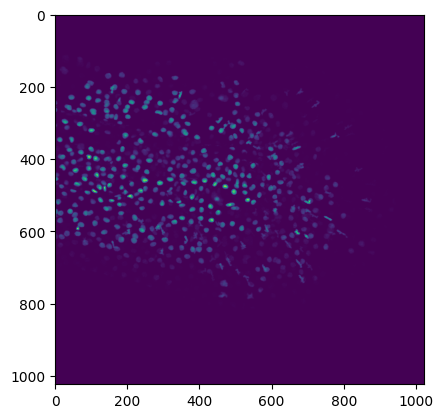

In [12]:
imshow(nd_obj.read_frame(1)[0])

In [10]:
from __future__ import annotations
import os
from typing import Iterable
import numpy as np
from tifffile import imread

def load_stack(img_list: list[os.PathLike], channel_list: str | Iterable[str], frame_range: int | Iterable[int], return_2D: bool=False)-> np.ndarray:
    # Convert to list if string or int
    if isinstance(channel_list, str):
        channel_list = [channel_list]
    
    if isinstance(frame_range, int):
        frame_range = [frame_range]
    
    # Load/Reload stack. Expected shape of images tzxyc
    exp_list = []
    for chan in channel_list:
        chan_list = []
        for frame in frame_range:
            f_lst = []
            for img in img_list:
                # To be able to load either _f3digit.tif or _f4digit.tif
                ndigit = len(img.split(os.sep)[-1].split('_')[2][1:])
                if chan in img and img.__contains__(f'_f%0{ndigit}d'%(frame+1)):
                    f_lst.append(imread(img))
            chan_list.append(f_lst)
        exp_list.append(chan_list)
    
    if len(channel_list)==1:
        stack = np.squeeze(np.stack(exp_list))
    else:
        stack = np.moveaxis(np.squeeze(np.stack(exp_list)), [0], [-1])

    # If stack is already 2D or want to load 3D
    if not return_2D or len(f_lst)==1:
        return stack
    
    # if stack is time series, then z is axis 1
    if len(frame_range)>1:
        return np.amax(stack, axis=1)
    # if not then z is axis 0
    else:
        return np.amax(stack, axis=0)

path = '/media/ben/Analysis/Python/Docker_mount/Test_images/nd2/Run2/c2z25t23v1_nd2_s1/Images'
img_list = [os.path.join(path,img) for img in sorted(os.listdir(path))]
stack = load_stack(img_list, 'GFP', range(5), False)
stack.shape

(5, 25, 512, 512)

In [15]:

sort_frame = {frame: [path for path in sorted(os.listdir(path)) if f"_f{frame+1:04d}" in path] for frame in range(23)}
sort_frame

{0: ['GFP_s01_f0001_z0001.tif',
  'GFP_s01_f0001_z0002.tif',
  'GFP_s01_f0001_z0003.tif',
  'GFP_s01_f0001_z0004.tif',
  'GFP_s01_f0001_z0005.tif',
  'GFP_s01_f0001_z0006.tif',
  'GFP_s01_f0001_z0007.tif',
  'GFP_s01_f0001_z0008.tif',
  'GFP_s01_f0001_z0009.tif',
  'GFP_s01_f0001_z0010.tif',
  'GFP_s01_f0001_z0011.tif',
  'GFP_s01_f0001_z0012.tif',
  'GFP_s01_f0001_z0013.tif',
  'GFP_s01_f0001_z0014.tif',
  'GFP_s01_f0001_z0015.tif',
  'GFP_s01_f0001_z0016.tif',
  'GFP_s01_f0001_z0017.tif',
  'GFP_s01_f0001_z0018.tif',
  'GFP_s01_f0001_z0019.tif',
  'GFP_s01_f0001_z0020.tif',
  'GFP_s01_f0001_z0021.tif',
  'GFP_s01_f0001_z0022.tif',
  'GFP_s01_f0001_z0023.tif',
  'GFP_s01_f0001_z0024.tif',
  'GFP_s01_f0001_z0025.tif',
  'RFP_s01_f0001_z0001.tif',
  'RFP_s01_f0001_z0002.tif',
  'RFP_s01_f0001_z0003.tif',
  'RFP_s01_f0001_z0004.tif',
  'RFP_s01_f0001_z0005.tif',
  'RFP_s01_f0001_z0006.tif',
  'RFP_s01_f0001_z0007.tif',
  'RFP_s01_f0001_z0008.tif',
  'RFP_s01_f0001_z0009.tif',
  'RFP_s01_

In [5]:
lst = ['GFP_s01_f0002_z0022.tif',
  'GFP_s01_f0002_z0023.tif',
  'GFP_s01_f0002_z0024.tif',
  'GFP_s01_f0002_z0025.tif',
  'RFP_s01_f0002_z0001.tif',
  'RFP_s01_f0002_z0002.tif',
  'RFP_s01_f0002_z0003.tif',
  'RFP_s01_f0002_z0004.tif',
  'RFP_s01_f0002_z0005.tif',
  'RFP_s01_f0002_z0006.tif',
  'RFP_s01_f0002_z0007.tif',]
order = ['RFP', 'GFP']
def custom_sort_key(name):
    try:
        return order.index(name)
    except ValueError:
        return len(order)
sorted(lst, key=order.index['RFP'])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [1]:
from nd2 import ND2File

path = '/home/Test_images/nd2/Run3/c3z1t1v3.nd2'
with ND2File(path) as value:
    nd2meta = {**value.sizes}
    nd2meta['um_per_pixel'] = value.metadata.channels[0].volume.axesCalibration[:2]
    nd2meta['T'] = 1 if 'T' not in nd2meta else nd2meta['T']
    if nd2meta['T']>1:
        nd2meta['interval_sec'] = value.experiment[0].parameters.periodMs/1000
    else:
        nd2meta['interval_sec'] = None
    value.close()
    
nd2meta['T'] = 1 if 'T' not in nd2meta else nd2meta['T']
nd2meta['C'] = 1 if 'C' not in nd2meta else nd2meta['C']
nd2meta['Z'] = 1 if 'Z' not in nd2meta else nd2meta['Z']
nd2meta['P'] = 1 if 'P' not in nd2meta else nd2meta['P']

original_keys = ['C', 'Z', 'T', 'P', 'X', 'Y']
new_keys = ['full_n_channels', 'n_slices', 'n_frames', 'n_series', 'img_width', 'img_length']

for i, key in enumerate(original_keys):
    nd2meta[new_keys[i]] = nd2meta.pop(key)

nd2meta['axes'] = ''
nd2meta['file_type'] = '.nd2'

nd2meta

{'um_per_pixel': (0.325, 0.325),
 'interval_sec': None,
 'full_n_channels': 3,
 'n_slices': 1,
 'n_frames': 1,
 'n_series': 3,
 'img_width': 1024,
 'img_length': 1024,
 'axes': '',
 'file_type': '.nd2'}

In [2]:
with ND2File(path) as value:
    arr = value.asarray()
    value.close()
arr.shape

(3, 3, 1024, 1024)

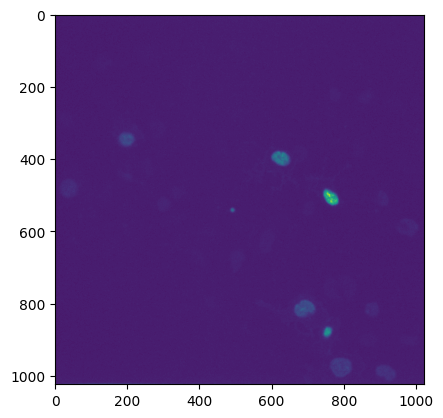

In [17]:
from matplotlib.pyplot import imshow
imshow(arr[(0,2)])

In [8]:
from __future__ import annotations
from tifffile import TiffFile

img_path = '/home/Test_images/tiff/Run3/c3z1t1v3s1.tif'

def calculate_um_per_pixel(meta_dict: dict) -> tuple[float,float]:
    """Calculate the um per pixel from the metadata of a tiff file. Output axes = (x,y)"""
    x_um_per_pix = round(1/meta_dict['XResolution'],ndigits=3)
    y_um_per_pix = round(1/meta_dict['YResolution'],ndigits=3)
    return x_um_per_pix,y_um_per_pix


tiff_meta = {}
# Open tif and read meta
with TiffFile(img_path) as tif:
    imagej_meta = tif.imagej_metadata
    imagej_meta['axes'] = tif.series[0].axes
    for page in tif.pages: # Add additional meta
        for tag in page.tags:
            if tag.name in ['ImageWidth','ImageLength',]:
                imagej_meta[tag.name] = tag.value
            if tag.name in ['XResolution','YResolution']:
                imagej_meta[tag.name] = tag.value[0]/tag.value[1]

if 'frames' not in imagej_meta: imagej_meta['frames'] = 1

if 'channels' not in imagej_meta: imagej_meta['channels'] = 1

if 'slices' not in imagej_meta: imagej_meta['slices'] = 1

if 'finterval' not in imagej_meta: 
    imagej_meta['finterval'] = None
else:
    imagej_meta['finterval'] = int(imagej_meta['finterval'])

original_keys = ['ImageWidth','ImageLength','frames','channels','slices','axes','finterval']
new_keys = ['img_width','img_length','n_frames','full_n_channels','n_slices','axes','interval_sec']

for i, key in enumerate(original_keys):
    tiff_meta[new_keys[i]] = imagej_meta[key]


tiff_meta['n_series'] = 1
tiff_meta['um_per_pixel'] = calculate_um_per_pixel(imagej_meta)

tiff_meta['file_type'] = '.tif'
tiff_meta

{'img_width': 1024,
 'img_length': 1024,
 'n_frames': 1,
 'full_n_channels': 3,
 'n_slices': 1,
 'axes': 'CYX',
 'interval_sec': None,
 'n_series': 1,
 'um_per_pixel': (0.325, 0.325),
 'file_type': '.tif'}

In [11]:
s = 'TZCYX'
s.replace('T','')

'ZCYX'

In [2]:
settings = {
    "input_folder": '/home/Test_images/nd2/Run2',
    "init":{"active_channel_list": ['GFP','RFP'],
            'full_channel_list':[],
            "overwrite": True},
    
    
    "run_bg_sub": (True,
                {"sigma": 0.0,
                "size": 7,
                "overwrite": False}),
    
    "run_channel_reg": (False,
                    {"reg_channel": "RFP",
                    "reg_mtd": "rigid_body",
                    "overwrite": False}),
    
    "run_frame_reg": (False,
                {"reg_channel": "RFP",
                "reg_mtd": "rigid_body",
                "img_ref": "previous",
                "overwrite": True}),
    
    "run_blur": (False,
            {"kernel": (15,15),
            "sigma": 5,
            "img_fold_src": "",
            "overwrite": False}),

    "run_cellpose": (False,
                {"channel_to_seg":"RFP",
                "model_type": "cyto3",
                "diameter": 60.0,
                "flow_threshold": 0.4,
                "cellprob_threshold": 0.0,
                "overwrite": False,
                "img_fold_src": "",
                "process_as_2D": True,
                "save_as_npy": False,
                "nuclear_marker": "",}),
    
    "run_threshold": (False,
                {"channel_to_seg":"RFP",
                "overwrite": True,
                "manual_threshold": None,
                "img_fold_src": "",}),
}
pre = {}
seg = {}
for k,v in settings.items():
    if k in ["run_bg_sub","run_channel_reg","run_frame_reg","run_blur"] and v[0]:
        pre[k] = v[1]
    
    if k in ["run_cellpose","run_threshold"] and v[0]:
        seg[k] = v[1]
print(seg)

{}


In [4]:
lsty = [False, False, False]
any(lsty)

False

In [1]:
from __future__ import annotations
from dataclasses import dataclass, field, fields

settings = {
    "input_folder": '/home/Test_images/nd2/Run2',
    "init":{"active_channel_list": ['GFP','RFP'],
            'full_channel_list':[],
            "overwrite": True},
    
    
    "bg_sub": (True,
                {"sigma": 0.0,
                "size": 7,
                "overwrite": True}),
    
    "chan_shift": (True,
                    {"reg_channel": "RFP",
                    "reg_mtd": "rigid_body",
                    "overwrite": False}),
    
    "frame_shift": (False,
                {"reg_channel": "RFP",
                "reg_mtd": "rigid_body",
                "img_ref": "previous",
                "overwrite": True}),
    
    "blur": (True,
            {"kernel": (15,15),
            "sigma": 5,
            "img_fold_src": "",
            "overwrite": False}),

    "cellpose": (False,
                {"channel_to_seg":"RFP",
                "model_type": "cyto3",
                "diameter": 60.0,
                "flow_threshold": 0.4,
                "cellprob_threshold": 0.0,
                "overwrite": False,
                "img_fold_src": "",
                "process_as_2D": True,
                "save_as_npy": False,
                "nuclear_marker": "",}),
    
    "threshold": (False,
                {"channel_to_seg":"RFP",
                "overwrite": True,
                "manual_threshold": None,
                "img_fold_src": "",}),
    
    "iou_track": (True,
                  {"channel_to_track":"RFP",
                   "img_fold_src": "",
                   "stitch_thres_percent": 0.75,
                   "shape_thres_percent": 0.2,
                   "n_mask":5,
                   "overwrite":False})
}

@dataclass
class BaseSettings:
    def __post_init__(self)-> None:
        # Get all the branch names of the class
        branch_name = [f.name for f in fields(self)]
        for k,v in self.settings.items():
            # Skip if key not in the class
            if k not in branch_name:
                continue
            # Initiate branch and unpack settings
            if v[0]:
                setattr(self, k, v[1])
        self.update_overwrite()
    
    def update_overwrite(self, overwrite_all: bool=False)-> None:
        """Update the overwrite of all subsequent methods. For example, if bg_sub has overwrite to True, 
        then all other preprocesses will also need to get overwritten since they use bg_sub images"""
        active_branches = self.get_active_branches
        current_overwrite = self.get_current_overwrite
        
        if overwrite_all:
            new_overwrite = [True for _ in range(len(current_overwrite))]
            self.set_new_overwrite(active_branches,new_overwrite)
            return
        
        # Get the new overwrite list, if the previous is true then change the next to true, else keep the same
        new_overwrite = []; is_False = True
        for i in range(len(current_overwrite)):
            if current_overwrite[i] == False and is_False:
                new_overwrite.append(current_overwrite[i])
            elif current_overwrite[i] == True and is_False:
                new_overwrite.append(current_overwrite[i])
                is_False = False
            elif not is_False:
                new_overwrite.append(True)# Update the overwrite attribute
        
        # Update the overwrite attribute
        self.set_new_overwrite(active_branches,new_overwrite)
        return
    
    def set_new_overwrite(self, active_branches: list[str], new_ow: list[bool])-> None:
        """Set the overwrite attribute of the active branches from the new overwrite list"""
        for i,branch in enumerate(active_branches):
            temp_dict = getattr(self,branch)
            temp_dict['overwrite'] = new_ow[i]
            setattr(self,branch,temp_dict)

    @property
    def get_active_branches(self)-> list[str]:
        return [f.name for f in fields(self) if hasattr(self,f.name) and f.name != 'settings']
    
    @property
    def get_current_overwrite(self)-> list[bool]:
        return [getattr(self,f)['overwrite'] for f in self.get_active_branches]

@dataclass
class PreProcessSettings(BaseSettings):
    settings: dict
    bg_sub: dict = field(init=False)
    chan_shift: dict = field(init=False)
    frame_shift: dict = field(init=False)
    blur: dict = field(init=False)
    
    
sets = PreProcessSettings(settings)
print(sets.get_current_overwrite)
print(sets.__dict__.keys())

[True, True, True]
dict_keys(['settings', 'bg_sub', 'chan_shift', 'blur'])


In [9]:
d = {'a':1, 'b':2}
if None not in d:
    print('yes')

yes


In [67]:
from __future__ import annotations
from os import PathLike, sep, listdir
from os.path import join
import numpy as np
from tifffile import imread, imwrite
from matplotlib.pyplot import imshow

def load_stack(img_list: list[PathLike], channel_list: str | Iterable[str], frame_range: int | Iterable[int], return_2D: bool=False)-> np.ndarray:
    # Convert to list if string or int
    if isinstance(channel_list, str):
        channel_list = [channel_list]
    
    if isinstance(frame_range, int):
        frame_range = [frame_range]
    
    # Load/Reload stack. Expected shape of images tzxyc
    exp_list = []
    for chan in channel_list:
        chan_list = []
        for frame in frame_range:
            f_lst = []
            for img in img_list:
                # To be able to load either _f3digit.tif or _f4digit.tif
                ndigit = len(img.split(sep)[-1].split('_')[2][1:])
                if chan in img and img.__contains__(f'_f%0{ndigit}d'%(frame+1)):
                    f_lst.append(imread(img))
            chan_list.append(f_lst)
        exp_list.append(chan_list)
    
    # Process stack
    if len(channel_list)==1:
        stack = np.squeeze(np.stack(exp_list))
    else:
        stack = np.moveaxis(np.squeeze(np.stack(exp_list)), [0], [-1])

    # If stack is already 2D or want to load 3D
    if len(f_lst)==1 or not return_2D:
        return stack
    
    # if stack is time series, then z is axis 1
    if len(frame_range)>1:
        return np.amax(stack, axis=1)
    # if not then z is axis 0
    else:
        return np.amax(stack, axis=0)

def get_masks_to_morph_lst(mask_stack: np.ndarray)-> list[tuple[int,int,int]]:
    """Function to determine the gaps between masks in a stack.
    Args:
        mask_stack (np.ndarray): 3D ndarray containing the mask stack.

    Returns:
        list[tuple[int,int,int]]: List of tuples containing the last and first mask surrounding the gap, as well as the gap length."""

    # Convert array to bool, whether mask is present or not
    is_masks = np.any(mask_stack,axis=(1,2))
    
    # If no gap return empty list
    if np.all(is_masks):
        return []
    
    # Find the differences between consecutive elements
    diff = np.diff(is_masks.astype(int))
    
    # Find the indices of the 1s and -1s, and add 1 to them to get the original index
    gap_starts = list(np.where(diff == -1)[0] + 1)
    gap_ends = list(np.where(diff == 1)[0] + 1)
    # If the first mask is missing, remove the first end, as the first starts is missing
    if not is_masks[0]:
        gap_ends.pop(0)
    # Get the gap list
    gap_lst = list(zip(gap_starts, gap_ends))
    return [(start, end, end-start) for start, end in gap_lst]


# img_path = '/home/Test_images/nd2/Run2/c2z25t23v1_nd2_s1/Masks_IoU_Track'
# img_list = [join(img_path,img) for img in sorted(listdir(img_path))]
# channel_list = ['RFP']
# frame_range = range(23)

# mask = load_stack(img_list,channel_list,frame_range)
mask_stack = np.ones((10,10,10))
# mask[mask!=14] = 0
mask_stack[-2:, :, :] = 0
mask_stack[4:5, :, :] = 0
# imwrite('/home/Test_images/masks/input.tif', mask.astype('uint16'))

# is_masks = np.any(mask,axis=(1,2))
# idx = np.where(is_masks)[0][0]
# mask[:idx-1,:,:] = mask[idx,:,:]

# idx = np.where(is_masks)[0][-1]
# mask[idx+1:,:,:] = mask[idx,:,:]
# imwrite('/home/Test_images/masks/output.tif', mask.astype('uint16'))

get_masks_to_morph_lst(mask_stack)


[(4, 5, 1)]

In [17]:
import sys
sys.path.append('/home/ImageAnalysis_pipeline/pipeline')
from mask_transformation.complete_track import complete_track

new_mask = complete_track(mask_stack, 5)
imwrite('/home/Test_images/masks/output_1mask.tif', new_mask.astype('uint16'))

  ---> Morphing missing masks


In [53]:
from tifffile import imread, imwrite
import numpy as np

img = imread('/home/Test_images/masks/input.tif')

def find_gap_indices(masks: np.ndarray, copy_first_to_start=False, copy_last_to_end=False):
    
    # Check if the first frame is missing a mask
    if not mask_present[0]:
        print("First frame is missing a mask.")
        if copy_first_to_start:
            masks[0] = masks[mask_present][0]

    # Check if the last frame is missing a mask
    if not mask_present[-1]:
        print("Last frame is missing a mask.")
        if copy_last_to_end:
            masks[-1] = masks[mask_present][-1]

    # Find the differences between consecutive elements
    diff = np.diff(mask_present.astype(int))

    # Find the indices of the 1s and -1s
    gap_starts = np.where(diff == -1)[0] + 1
    gap_ends = np.where(diff == 1)[0] + 1

    return gap_starts, gap_ends
mask_present = np.any(img, axis=(1, 2))
print(mask_present)
# Find the differences between consecutive elements
diff = np.diff(mask_present.astype(int))
print(diff)
# Find the indices of the 1s and -1s
gap_starts = list(np.where(diff == -1)[0]+1)
gap_ends = list(np.where(diff == 1)[0]+1)
if not mask_present[0]:
    gap_ends.pop(0)
print(gap_starts, gap_ends)
gap_lst = list(zip(gap_starts, gap_ends))
gap_lst = [(start,end,end-start) for start,end in gap_lst]
gap_lst
# # Add 1 to the gap_starts and gap_ends to get the actual indices of the masks that surround the gap
# gap_starts += 1
# gap_ends += 1


[False False False False False False  True  True  True  True  True  True
  True  True  True False False False False  True  True  True  True]
[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0]
[15] [19]


[(15, 19, 4)]

In [91]:
from skimage.draw import disk
def mask_stack():
    img = np.zeros((10, 10, 10), dtype=np.uint8)
    rr, cc = disk((5, 5), 4)
    img[:,rr, cc] = 1

    return img
img = mask_stack()
img[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [2]:
center = (2,2)
centroid = tuple([int(c/2) for c in center])
centroid

(1, 1)

In [1]:
lst = [1]*5
lst

[1, 1, 1, 1, 1]

In [51]:
from __future__ import annotations
import numpy as np
from scipy.spatial.distance import directed_hausdorff
from os import PathLike, sep,listdir
from os.path import join
from typing import Iterable
from tifffile import imread, imwrite
from scipy.ndimage import center_of_mass
from skimage.draw import disk

def dice_coefficient(mask1, mask2):
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)
    intersection = np.logical_and(mask1, mask2)
    imwrite('/home/Test_images/masks/intersection.tif', intersection.astype('uint16'))
    return 2. * intersection.sum() / (mask1.sum() + mask2.sum())

def hausdorff_distance(mask1, mask2):
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)
    return max(directed_hausdorff(mask1, mask2)[0], directed_hausdorff(mask2, mask1)[0])

def centroid(mask1: np.ndarray, mask2: np.ndarray)-> tuple[int,int]:
    cent1 = center_of_mass(mask1)
    cent2 = center_of_mass(mask2)
    return np.sqrt((cent1[0]-cent2[0])**2 + (cent1[1]-cent2[1])**2)

def load_stack(img_list: list[PathLike], channel_list: str | Iterable[str], frame_range: int | Iterable[int], return_2D: bool=False)-> np.ndarray:
    # Convert to list if string or int
    if isinstance(channel_list, str):
        channel_list = [channel_list]
    
    if isinstance(frame_range, int):
        frame_range = [frame_range]
    
    # Load/Reload stack. Expected shape of images tzxyc
    exp_list = []
    for chan in channel_list:
        chan_list = []
        for frame in frame_range:
            f_lst = []
            for img in img_list:
                # To be able to load either _f3digit.tif or _f4digit.tif
                ndigit = len(img.split(sep)[-1].split('_')[2][1:])
                if chan in img and img.__contains__(f'_f%0{ndigit}d'%(frame+1)):
                    f_lst.append(imread(img))
            chan_list.append(f_lst)
        exp_list.append(chan_list)
    
    # Process stack
    if len(channel_list)==1:
        stack = np.squeeze(np.stack(exp_list))
    else:
        stack = np.moveaxis(np.squeeze(np.stack(exp_list)), [0], [-1])

    # If stack is already 2D or want to load 3D
    if len(f_lst)==1 or not return_2D:
        return stack
    
    # if stack is time series, then z is axis 1
    if len(frame_range)>1:
        return np.amax(stack, axis=1)
    # if not then z is axis 0
    else:
        return np.amax(stack, axis=0)
    
masks_path = '/home/Test_images/nd2/Run2/c2z25t23v1_nd2_s1/Masks_IoU_Track'
masks = [join(masks_path,mask) for mask in sorted(listdir(masks_path))]
mask = load_stack(masks, 'RFP', range(23), False)
mask[mask!=32] = 0
# med = np.median(mask, axis=0)
m1 = mask[3]
m2 = mask[6]
imwrite('/home/Test_images/masks/mask1.tif', (m1).astype('uint16'))
imwrite('/home/Test_images/masks/mask2.tif', (m2).astype('uint16'))
# m1 = np.zeros((10, 10, 10), dtype=np.uint8)
# rr, cc = disk((4, 5), 5)
# m1[:,rr, cc] = 1

# m2 = np.zeros((10, 10, 10), dtype=np.uint8)
# rr, cc = disk((1, 1), 3)
# m2[:,rr, cc] = 1
dc = dice_coefficient(m1,m2)
# dc = [dice_coefficient(med,mask[i]) for i in range(23)]
# hd = [hausdorff_distance(med,mask[i]) for i in range(23)]
# for i in range(23):
#     if dc[i]<=0.8:
#         mask[i] = 0
# imwrite('/home/Test_images/masks/output.tif', (mask).astype('uint16'))
# cent = [centroid(med,mask[i]) for i in range(23)]
# print(hd)
# print(cent)
print(dc)

0.10432801822323462


In [3]:
from dataclasses import dataclass

@dataclass
class MockDataClass:
    name: str
    age: int

    @property
    def full_name(self) -> str:
        return f"{self.name} Doe"

mock = MockDataClass('John', 30)
mock.full_name
print(mock.full_name)
print(mock.__dict__)


John Doe
{'name': 'John', 'age': 30}


In [1]:
from skimage.measure import regionprops, regionprops_table
from skimage.morphology import erosion, disk
from tifffile import imread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

img_path = "/home/Test_images/masks/MAX_Images.tif"
stack_path = "/home/Test_images/masks/MAX_Merged.tif"
mask_path = "/home/Test_images/masks/Masks_IoU_Track.tif"

img = imread(img_path)
stack = imread(stack_path)
stack = np.moveaxis(stack, [1], [-1])
mask = imread(mask_path)

# m1 = mask[0].copy()
# m1[m1!=14] = 0
# eroded = erosion(m1, disk(5))
# m2 = m1-eroded
# lst_props = [regionprops(mask[i], intensity_image=stack[i]) for i in range(23)]
# properties_lst = ['area','centroid','intensity_mean',
#                        'label','perimeter','slice','solidity']
# lst_table = [regionprops_table(mask[i], intensity_image=stack[i],properties=properties_lst) for i in range(23)]
# df = pd.concat([pd.DataFrame(lst_table[i]) for i in range(23)])
# prop_img = regionprops(mask[0], intensity_image=img[0])
# prop_stack = regionprops(mask[0], intensity_image=stack[0])
# plt.imshow(m1)
# plt.show()
# plt.imshow(m2)
# plt.show()
# p1 = regionprops(m1, intensity_image=img[0])
# p2 = regionprops(m2, intensity_image=img[0])
props = regionprops_table(mask,properties=['slice','label'])

In [24]:
m1 = mask.copy()
m1[m1!=2] = 0
print(m1[0].shape)
prop = regionprops(m1[0])[0].centroid
prop

(512, 512)


(11.807221898660455, 365.82818870122304)

<class 'zip'>
(slice(0, 23, None), slice(0, 61, None), slice(212, 327, None))
(23, 61, 115)


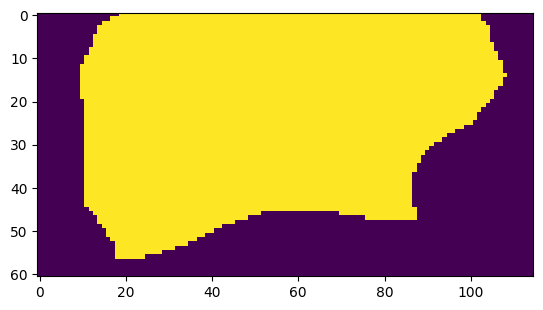

In [12]:
import matplotlib.pyplot as plt
slices,lables = props.values()
print(type(zip(*props.values())))
print(slices[0])
temp = mask[slices[0]]
temp[temp!=lables[0]] = 0
print(temp.shape)
plt.imshow(temp[0])

In [5]:
slices[0]

(slice(0, 23, None), slice(0, 61, None), slice(212, 327, None))

In [6]:
df

,area,centroid-0,centroid-1,intensity_mean-0,intensity_mean-1,label,perimeter,slice,solidity
0,4287.0,23.339631,265.574994,104.145323,318.791929,1,282.953319,"(slice(0, 57, None), slice(222, 321, None))",0.918577
1,1717.0,11.807222,365.828189,111.845079,437.776937,2,198.183766,"(slice(0, 29, None), slice(329, 408, None))",0.948095
2,3497.0,28.863597,443.654275,68.848727,190.416643,3,240.900541,"(slice(0, 72, None), slice(407, 482, None))",0.953641
3,4962.0,43.057840,145.551995,27.669287,84.853890,4,273.178716,"(slice(1, 84, None), slice(106, 190, None))",0.970847
4,3383.0,56.052912,487.861366,208.868756,544.319243,5,262.202056,"(slice(13, 97, None), slice(440, 512, None))",0.901652
...,...,...,...,...,...,...,...,...,...
30,2350.0,492.147234,33.950638,31.967234,130.385532,31,224.195959,"(slice(466, 511, None), slice(0, 79, None))",0.827174
31,1650.0,213.744848,70.218788,49.948485,296.166667,32,171.817280,"(slice(181, 242, None), slice(47, 90, None))",0.883771
32,4875.0,80.364513,261.834051,48.362051,220.006769,33,295.143182,"(slice(45, 124, None), slice(219, 315, None))",0.928571
33,3181.0,174.657655,283.275385,116.214712,676.642251,34,245.072114,"(slice(143, 209, None), slice(244, 327, None))",0.957556


In [3]:
import matplotlib.pyplot as plt
from tifffile import imwrite
value = 14
f = 20
slice_lst = [lst_props[f][value-1].slice for f in range(stack.shape[0])]
area_lst = [lst_props[f][value-1].area_bbox for f in range(stack.shape[0])]    
# sl = sl[::-1]
max_ind = area_lst.index(max(area_lst))
max_slice = slice_lst[max_ind]
print(max_slice)

#crop stack
crop = stack[:,max_slice[0],max_slice[1],:]
crop = np.moveaxis(crop, [-1], [1])
imwrite(f'/home/Test_images/masks/stack_{value}.tif', crop)
# frame = stack[f]
# plt.imshow(frame[sl])
# plt.show()


(slice(181, 301, None), slice(202, 341, None))


In [16]:
from __future__ import annotations
from skimage.measure import regionprops_table, regionprops
from skimage.measure._regionprops import RegionProperties
import numpy as np
from os import PathLike
import pandas as pd
from tifffile import imread
from concurrent.futures import ThreadPoolExecutor
import time


img_path = "/home/Test_images/masks/MAX_Images.tif"
stack_path = "/home/Test_images/masks/MAX_Merged.tif"
mask_path = "/home/Test_images/masks/Masks_IoU_Track.tif"

img = imread(img_path)
stack = imread(stack_path)
stack = np.moveaxis(stack, [1], [-1])
mask = imread(mask_path)


def regionprops_to_df(img_props: RegionProperties)-> pd.DataFrame:
    """
    Read content of all attributes for every item in a list
    output by skimage.measure.regionprops
    """

    attributes_list = ['area','centroid','intensity_mean',
                       'label','perimeter','slice','solidity']

    # Initialise list of lists for parsed data
    parsed_data = []
    # Put data from img_props into list of lists
    for i, img_prop in enumerate(img_props):
        parsed_data += [[]]
        for j in range(len(attributes_list)):
            parsed_data[i] += [getattr(img_prop, attributes_list[j])]
        
    # Return as a Pandas DataFrame
    return pd.DataFrame(parsed_data, columns=attributes_list)
        
def unpack_intensity(df: pd.DataFrame, channels: str | list[str])-> pd.DataFrame:
    """Unpack the intensity values from the regionprops DataFrame and add them as separate columns.
    The original output a tuple of intensities for each channel. This function will simply unpack
    the tuple and add the intensity values as separate columns for each channel.
    
    Args:
        df (pd.DataFrame): DataFrame containing the regionprops output.
        channels (list[str]): List of channel names.
    Returns:
        pd.DataFrame: DataFrame with the unpacked intensity values as separate columns for each channel."""
    
    # If only one channel is present, then the intensity_mean is a float, not a tuple
    if isinstance(df.intensity_mean[0], float):
        if len(channels)!=1:
            raise ValueError("Only one channel is present in the DataFrame. Please provide only 1 channel label.")
        
        if isinstance(channels, list):
            channels = channels[0]
        
        df.rename(columns={'intensity_mean': f'intensity_mean_{channels}'}, inplace=True)
        return df
    
    # If multiple channels are present, then the intensity_mean is a tuple of floats
    if len(channels)!=len(df.intensity_mean[0]):
        raise ValueError(f"The number of channels do not match the number of intensity values. \
            Please add {len(df.intensity_mean[0])} channel labels.")
    
    data = {channels[i]:[intensity[i] for intensity in df.intensity_mean] for i in range(len(channels))}
    attr_ind = df.columns.get_loc('intensity_mean')
    for i, channel in enumerate(channels):
        if i==0:
            df.intensity_mean = data[channel]
            df.rename(columns={'intensity_mean': f"intensity_mean_{channel}"}, inplace=True)
        else:
            df.insert(attr_ind+i, f"intensity_mean_{channel}", data[channel])
    return df

def extract_table(img_array: np.ndarray, mask_array: np.ndarray, channels: list[str], save_path: PathLike)-> pd.DataFrame:
    properties_lst = ['area','centroid','intensity_mean',
                       'label','perimeter','slice','solidity']
    col_rename= {'centroid_0':'centroid_y','centroid_1':'centroid_x'}
    def get_regionprops(frame: int)-> pd.DataFrame:
        """Nested function to extract the regionprops for each frame in multi-threading."""
        prop = regionprops_table(mask_array[frame], intensity_image=img_array[frame],
                                 properties=properties_lst,separator='_')
        df = pd.DataFrame(prop)
        # df = regionprops_to_df(prop)
        df['frame'] = frame+1
        return df

    # If the mask_array is not a time sequence
    if mask_array.ndim ==2:
        prop = regionprops_table(mask_array, intensity_image=img_array,
                                 properties=properties_lst,separator='_')
        master_df = pd.DataFrame(prop)
        master_df['frame'] = 1
        col_rename['intensity_mean'] = f'intensity_mean_{channels[0]}'
        master_df.rename(columns=col_rename, inplace=True)
        # master_df = unpack_intensity(master_df, channels)
        master_df.to_csv(save_path, index=False, header=True)
        return master_df
    
    # If the mask_array is a time sequence
    with ThreadPoolExecutor() as executor:
        lst_df = executor.map(get_regionprops, range(mask_array.shape[0]))
    
    # Create the DataFrame and save to csv
    master_df = pd.concat(lst_df, ignore_index=True)
    col_rename = {**col_rename,**{f'intensity_mean_{i}':f'intensity_mean_{channels[i]}' for i in range(len(channels))}}
    master_df.rename(columns=col_rename, inplace=True)
    master_df.to_csv(save_path, index=False, header=True)
    return master_df

def extract_data(img_array: np.ndarray, mask_array: np.ndarray, channels: list[str], save_path: PathLike)-> pd.DataFrame:
    def get_regionprops(frame: int)-> pd.DataFrame:
        """Nested function to extract the regionprops for each frame in multi-threading."""
        prop = regionprops(mask_array[frame], intensity_image=img_array[frame])
        df = regionprops_to_df(prop)
        df['frame'] = frame+1
        return unpack_intensity(df,channels)

    # If the mask_array is not a time sequence
    if mask_array.ndim ==2:
        prop = regionprops(mask_array, intensity_image=img_array)
        master_df = regionprops_to_df(prop)
        master_df['frame'] = 1
        master_df = unpack_intensity(master_df, channels)
        master_df.to_csv(save_path, index=False, header=True)
        return master_df
    
    # If the mask_array is a time sequence
    with ThreadPoolExecutor() as executor:
        lst_df = executor.map(get_regionprops, range(mask_array.shape[0]))
    
    # Create the DataFrame and save to csv
    master_df = pd.concat(lst_df, ignore_index=True)
    master_df.to_csv(save_path, index=False, header=True)
    return master_df

start = time.time()
master_df = extract_data(stack, mask, ['GFP','RFP'], '/home/Test_images/masks/regionprops.csv')
end1 = time.time()

# lst_df = [regionprops_to_df(prop) for prop in lst_props]
# lst_unpack = [unpack_intensity(df, ['GFP','RFP']) for df in lst_df]
# # Add the frame number to the DataFrame
# for i,df in enumerate(lst_unpack):
#     df['frame'] = i
# master_df = pd.concat(lst_unpack, ignore_index=True)
master_df = extract_table(stack, mask, ["GFP",'RFP'], '/home/Test_images/masks/regionprops.csv')
end2 = time.time()
print(f"Regionprops: {end1-start}, Regionprops_table: {end2-end1}")


Regionprops: 0.6202468872070312, Regionprops_table: 0.6223130226135254


In [17]:
master_df

,area,centroid_y,centroid_x,intensity_mean_GFP,intensity_mean_RFP,label,perimeter,slice,solidity,frame
0,4287.0,23.339631,265.574994,104.145323,318.791929,1,282.953319,"(slice(0, 57, None), slice(222, 321, None))",0.918577,1
1,1717.0,11.807222,365.828189,111.845079,437.776937,2,198.183766,"(slice(0, 29, None), slice(329, 408, None))",0.948095,1
2,3497.0,28.863597,443.654275,68.848727,190.416643,3,240.900541,"(slice(0, 72, None), slice(407, 482, None))",0.953641,1
3,4962.0,43.057840,145.551995,27.669287,84.853890,4,273.178716,"(slice(1, 84, None), slice(106, 190, None))",0.970847,1
4,3383.0,56.052912,487.861366,208.868756,544.319243,5,262.202056,"(slice(13, 97, None), slice(440, 512, None))",0.901652,1
...,...,...,...,...,...,...,...,...,...,...
797,2350.0,492.147234,33.950638,31.967234,130.385532,31,224.195959,"(slice(466, 511, None), slice(0, 79, None))",0.827174,23
798,1650.0,213.744848,70.218788,49.948485,296.166667,32,171.817280,"(slice(181, 242, None), slice(47, 90, None))",0.883771,23
799,4875.0,80.364513,261.834051,48.362051,220.006769,33,295.143182,"(slice(45, 124, None), slice(219, 315, None))",0.928571,23
800,3181.0,174.657655,283.275385,116.214712,676.642251,34,245.072114,"(slice(143, 209, None), slice(244, 327, None))",0.957556,23


In [23]:
df_unpack.iloc[:,-1]

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
Name: frame, dtype: int64

In [65]:
# One channel
pd.merge(df_img.dtypes.rename('img'), df_stack.dtypes.rename("stack"), left_index=True, right_index=True, how='outer')

,img,stack
area,float64,float64
area_bbox,float64,float64
area_convex,float64,float64
area_filled,float64,float64
axis_major_length,float64,float64
axis_minor_length,float64,float64
bbox,object,object
centroid,object,object
centroid_local,object,object
centroid_weighted,object,object


In [71]:

diff = [np.all(df_img[col].astype(str)==df_stack[col].astype(str)) for col in df_img.columns]


(array([], dtype=int64),)

In [75]:
false_obj = [ind for ind, val in enumerate(diff) if not val]
df_img.columns[false_obj]

Index(['centroid_weighted', 'centroid_weighted_local', 'intensity_max',
       'intensity_mean', 'intensity_min', 'moments_weighted',
       'moments_weighted_central', 'moments_weighted_hu',
       'moments_weighted_normalized'],
      dtype='object')

In [13]:
df_img.centroid_weighted[0]

(24.982012269553902, 264.5472852660083)

In [14]:
df_stack.centroid_weighted[0]


(array([24.98201227, 24.97970162]), array([264.54728527, 265.99826511]))

In [51]:
for arr in df_stack.moments_weighted_hu[0]:
    print(arr)
    for i,ch in enumerate(['RFP','GFP']):
        print(arr[i])

[0.0018943 0.0006341]
0.0018942986301878331
0.0006341037549663308
[9.23318944e-07 1.01381019e-07]
9.233189436959841e-07
1.0138101859811246e-07
[4.60035118e-10 1.58609429e-11]
4.6003511824314207e-10
1.586094288682459e-11
[8.41221557e-11 1.99255781e-12]
8.412215574205486e-11
1.9925578138452377e-12
[1.37423627e-20 4.29683440e-24]
1.3742362696434462e-20
4.2968343962112716e-24
[5.69427422e-14 1.84800426e-16]
5.694274224861307e-14
1.8480042642766522e-16
[-9.21972930e-21 -1.03447349e-23]
-9.219729304438005e-21
-1.034473491741686e-23


In [143]:
channels = ['RFP','GFP']
data = {ch:[intensity[i] for intensity in df_stack.intensity_mean] for i,ch in enumerate(channels)}
data

{'RFP': [104.14532306974574,
  111.84507862550961,
  68.84872748069775,
  27.669286577992747,
  208.86875554241797,
  75.60394120497496,
  63.55848623853211,
  104.85850091407679,
  62.541935483870965,
  177.34037692747,
  93.77170077628793,
  226.53812858052197,
  29.87294801641587,
  126.10680190930788,
  34.616766467065865,
  107.04249291784703,
  37.65494685200327,
  43.914897544766475,
  34.178768577494694,
  46.36316821971555,
  80.00132450331125,
  59.817541528239204,
  243.46511627906978,
  23.722823733217844,
  21.60587002096436,
  60.8152216555512,
  250.25993985967256,
  32.487752161383284,
  26.814723926380367,
  31.904761904761905,
  49.587434554973825,
  43.13833992094862,
  100.89289289289289,
  20.392692146157078],
 'GFP': [318.7919290879403,
  437.7769365171811,
  190.4166428367172,
  84.85388956066102,
  544.3192432751995,
  274.6073332256501,
  221.4631116207951,
  359.5405850091408,
  172.05868886576482,
  430.3569388920617,
  378.3345095271701,
  670.4728198599618,

In [139]:
channels = ['RFP','GFP']
data = {ch:[] for ch in channels}
for value in df_stack.moments_weighted:
    for i,ch in enumerate(channels):
        data[ch].append([array[:,i] for array in value])

data['RFP'][0]
    

[array([4.46471000e+05, 1.89961290e+07, 1.09128561e+09, 7.17942555e+10]),
 array([1.11537440e+07, 4.57566243e+08, 2.51328193e+10, 1.57843690e+12]),
 array([3.73193660e+08, 1.48338280e+10, 7.90001891e+11, 4.81584118e+13]),
 array([1.41625400e+10, 5.43401033e+11, 2.82109007e+13, 1.68592945e+15])]

In [119]:
channels = ['RFP','GFP']
lst = [list(zip(*df_stack.centroid_weighted_local[i])) for i in range(len(df_stack.centroid_weighted))]
data = {channels[i]: [el[i] for el in lst] for i in range(len(channels))}
data["RFP"]

[(24.982012269553902, 42.547285266008316),
 (13.197690040512816, 38.964444537018714),
 (29.382079546776097, 43.77340050838165),
 (44.265129829928256, 39.17692559816454),
 (44.28852269237464, 46.6409836923987),
 (40.40545523689068, 56.13999367607848),
 (37.87497970156794, 51.744868255658),
 (35.553475040796684, 54.39356074870636),
 (41.75416785906813, 42.533941846303335),
 (16.729569146246817, 30.636725781987163),
 (58.04245171195376, 35.31709620732345),
 (39.06850853940275, 79.17910576091471),
 (39.26430906083104, 54.82176568573015),
 (53.96295237869934, 62.891174564121975),
 (31.430135856186713, 20.719784971990475),
 (54.169570740485895, 83.12787871169216),
 (37.613617939141264, 43.49843654998697),
 (37.34540348989226, 50.71862270741991),
 (38.18072828018039, 20.58874905268912),
 (37.8604530621096, 41.47934352009055),
 (71.77229681627787, 72.14714436295205),
 (62.092604975929014, 45.43910718530548),
 (36.3248077847371, 33.57521753567221),
 (33.87264495399445, 22.377756681758434),
 (34

In [54]:
import numpy as np
import time
start = time.time()
for value in np.unique(mask):
    is_complete = np.all(np.any(mask==value, axis=(1,2)))
    if not is_complete:
        print(value)
end = time.time()
print((end-start))


30
0.15466690063476562


In [64]:
start = time.time()
lst_obj = [np.unique(frame) for frame in mask]
lst_obj = np.concatenate(lst_obj)
# lst_obj = [item for sublst in lst_obj for item in sublst]
value,cnt = np.unique(lst_obj,return_counts=True)
obj_to_delete = value[cnt!=23]
for value in obj_to_delete:
    print(value)
# for obj, cnt in np.unique(lst_obj,return_counts=True):
#     if cnt!=23:
#         print(obj)
end = time.time()
print((end-start))

30
0.04352402687072754


In [67]:
def trim_incomplete_track(array: np.ndarray)-> np.ndarray:
    """Function to trim the incomplete tracks from the mask stack.
    Args:
        array (np.ndarray): 3D Mask array in tyx format.
    Returns:
        np.ndarray: Mask array with incomplete tracks removed."""
    # Make a list of unique objects
    lst_obj = [np.unique(frame) for frame in array]
    lst_obj = np.concatenate(lst_obj) # Flatten the list
    # Count the number of occurences of each object
    obj,cnt = np.unique(lst_obj,return_counts=True)
    # Create a list of obj to remove
    obj_to_remove = obj[cnt!=20]
    for obj in obj_to_remove:
        array[array==obj] = 0
    return array
start = time.time()
mask = imread(mask_path)

lst_obj = [np.unique(frame) for frame in mask]
lst_obj = np.concatenate(lst_obj)
# lst_obj = [item for sublst in lst_obj for item in sublst]
value,cnt = np.unique(lst_obj,return_counts=True)
obj_to_delete = value[cnt!=20]
print("Before: ",obj_to_delete)

mask = trim_incomplete_track(mask)

lst_obj = [np.unique(frame) for frame in mask]
lst_obj = np.concatenate(lst_obj)
# lst_obj = [item for sublst in lst_obj for item in sublst]
value,cnt = np.unique(lst_obj,return_counts=True)
obj_to_delete = value[cnt!=20]
print("After: ",obj_to_delete)
end = time.time()
print((end-start))

Before:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35]
After:  [0]
0.1704254150390625


In [5]:
import numpy as np
maskNum = 35
intensity = np.nanmean(a=img,where=mask==maskNum)
intensity
print(intensity, prop[maskNum-1].intensity_mean)

117.43083573487031 117.43083573487031


In [4]:
from sys import getsizeof
getsizeof(prop)

424

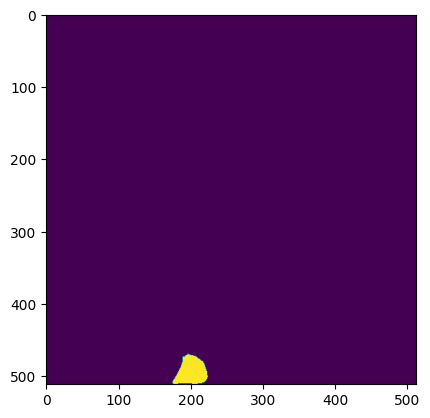

In [6]:
from matplotlib.pyplot import imshow
temp = mask.copy()
temp[temp!=maskNum] = 0
imshow(temp)

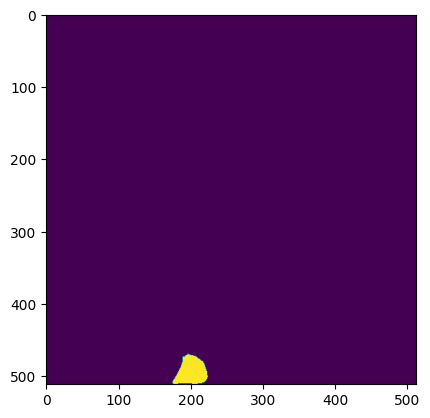

In [17]:
new_mask = np.zeros_like(mask)


value = prop[maskNum-1].coords.tolist()
for y,x in prop[maskNum-1].coords:
    new_mask[y,x] = maskNum
imshow(new_mask)

In [5]:
from importlib.metadata import version

version('ImageAnalysis')

import pkg_resources

def get_version():
    try:
        return pkg_resources.get_distribution("ImageAnalysis").version
    except pkg_resources.DistributionNotFound:
        return "Package not found"
print(get_version())

1.0.0


/tmp/ipykernel_79033/3457485119.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [50]:
d2 = {'a':1, 'b':5}
d1 = {'a':1, 'b':2, 'c':3}
d = {**d1, **d2}
d

{'a': 1, 'b': 5, 'c': 3}

In [15]:
from os import sep
input_fold = '/home/Test_images/nd2/Run2'
parent_path = input_fold.rsplit(sep,1)[0]
img_path = '/home/Test_images/nd2/Run2/treated/100mg/c2z25t23v1_nd2.nd2'
img = img_path.replace(parent_path,'').split(sep)[1:-1]
print(img)

['Run2', 'treated', '100mg']


In [4]:
from tifffile import imread
import numpy as np
img_paths = ['/home/Test_images/nd2/Run3/c3z1t1v3_s1/Masks_Cellpose/RFP_s01_f0001_z0001.tif']
frame_range = range(1)
channels = ['RFP']
exp_list = []
for chan in channels:
    chan_list = []
    for frame in frame_range:
        f_lst = []
        for path in img_paths:
            if chan in path and path.__contains__(f'_f%04d'%(frame+1)):
                f_lst.append(imread(path))
        chan_list.append(f_lst)
    exp_list.append(chan_list)
np.squeeze(np.array(exp_list)).shape

(1024, 1024)

In [16]:
from os import listdir
import re
scan = listdir('/home/Test_images/bigy/HEKA_c1031_c1829_miniSOG_80%_435_2min_40min_002_Merged_s1/Images')
# frames = [re.search('f\d{4}', frame).group() for frame in scan if re.search('f\d{4}', frame)]
# len(set(frames))
channel_seg = "GFP"
file_type = '.tif'
any(channel_seg in file for file in scan if file.endswith(file_type))

False

In [13]:
d = {'b':1}

if d and 'a' in d:
    print('yes')
else:
    print('no')

no


In [6]:
import json
good = '/home/Test_images/bigy/HEKA_c1031_c1829_miniSOG_80%_435_2min_40min_002_Merged_s1/exp_settings.json'

with open(good,'r') as fp:
    meta = json.load(fp)
meta['segmentation']['cellpose_seg']['RFP']['cellpose_eval']

{'batch_size': 8,
 'resample': True,
 'channels': [0, 0],
 'channel_axis': None,
 'z_axis': None,
 'normalize': {'percentile': [1, 99]},
 'invert': False,
 'rescale': None,
 'diameter': 30.0,
 'flow_threshold': 0.5,
 'cellprob_threshold': 0,
 'do_3D': False,
 'anisotropy': None,
 'stitch_threshold': 0.0,
 'min_size': 15,
 'niter': None,
 'augment': False,
 'tile': True,
 'tile_overlap': 0.1,
 'bsize': 224,
 'interp': True,
 'compute_masks': True,
 'progress': None}

In [8]:
# import cv2
# from tifffile import imread
# import os
# os.environ['OPENCV_IPP'] = 'disabled'
# img = imread('/home/Test_images/masks/mask_end.tif')


# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('image', 600,600)
# cv2.imshow('image', img)

# def handle_click(event, x, y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         # When the left mouse button is clicked, set the focus back to the script
#         os.system('wmctrl -a "Your Terminal Window Name"')

# cv2.setMouseCallback('image', handle_click)

# f=0
# while f!=-1:
#     key=cv2.waitKeyEx(1) & 0xFF
#     if key !=255:
#         print(key)
#     if key == ord('q'):
#         f=-1
# cv2.destroyAllWindows() 



X Error: BadAccess (attempt to access private resource denied) 10
  Extension:    130 (MIT-SHM)
  Minor opcode: 1 (X_ShmAttach)
  Resource id:  0x4200024
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 

103
104
106
107
82
83
84
81


X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_Shm

104


X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029


104
100


X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029


98
106


X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_Shm

113


X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
X Error: BadShmSeg (invalid shared segment parameter) 128
  Extension:    130 (MIT-SHM)
  Minor opcode: 3 (X_ShmPutImage)
  Resource id:  0x4200029
